[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


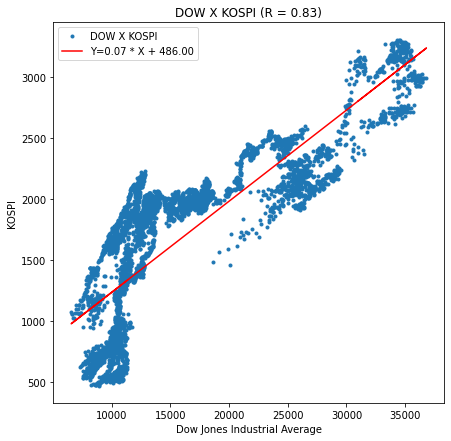

In [1]:
# 파이썬으로 주식(ETF) 간 상관관계 구하기(회귀 분석)
# https://dotsnlines.tistory.com/591?category=1028593

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt
 
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')
 
df = pd.DataFrame({'X':dow['Close'],'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
 
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y={regr.slope:.2f} * X + {regr.intercept:.2f}'
 
plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept,'r')
plt.legend(['DOW X KOSPI', regr_line])
plt.title(f'DOW X KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


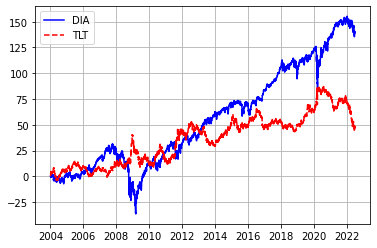

In [2]:
# 파이썬을 이용해서 주식/ETF의 누적 수익률 비교하기
# https://dotsnlines.tistory.com/588?category=1028593

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
 
a = pdr.get_data_yahoo('DIA', start='2004-01-04')
b = pdr.get_data_yahoo('TLT', start='2004-01-04')
 
a_dpc = (a['Close']/a['Close'].shift(1) - 1)*100
a_dpc.iloc[0] = 0
 
b_dpc = (b['Close']/b['Close'].shift(1) - 1)*100
b_dpc.iloc[0] = 0
 
a_dpc_cs = a_dpc.cumsum()
b_dpc_cs = b_dpc.cumsum()
 
plt.plot(a.index, a_dpc_cs, 'b', label='DIA')
plt.plot(b.index, b_dpc_cs, 'r--', label='TLT')
plt.grid(True)
plt.legend(loc='best')
plt.show()
